 # Accident_Severity prediction  

##  Introduction To  Business Problem

### A.1. Background Description

<i>Traffic accidents result in severe fatalities across the world and are the leading cause of death for people aged 15-29. Weather patterns can have a dramatic impact on the safety of driving in specific regions, due to limited visibility and reduced grip from tyres.

When people start planning their trips between places they tend to check their route first and see estimated time to arrival, but often don’t see any warnings for weather or increased accident risks on certain roads. Due to this, drivers might end up taking a dangerous route and encounter treacherous road surfaces and end up in an accident.
<i>

#### According to Road Crash Statistics
 
Approximately 1.35 million people die in road crashes annually, on average 3,700 people lose their lives every day on the roads.

An additional 20–50 million suffer non-fatal injuries, often resulting in long-term disabilities.
        

### A.2 Problem 
The objective is to explore the dataset from https://www.gov.uk/government/collections/road-accidents-and-safety-statistics called road safety data
and determine what are the key factors that drive the outcome of an accident for the involved car(s)' passengers: light injuries, severe injuries, fatal outcome. Additionally, the outcomes of this analysis can be used as a prescriptive tool to :

(1) Have the appropriate medical emergency resources allocated for the times, locations and circumstances when accidents are most likely to occur, with a particular emphasis on the severe and life-threatening cases.

(2) Design prevention measures based on those accident factors identified as having the largest influence on accident outcomes.
### A.3 Interest 
By being able to allocate medical emergency resources more efficiently and by being able to reduce injuries and deaths through prevention campaigns, society as a whole will reduce the economic impact of road hazards. This analysis is therefore aimed at decision-makers of the uk govt, notably those in charge of Transportation and Medical Affairs. Beyond economic considerations, there is also a moral value in reducing the suffering and deaths of the thousands of people affected by road accidents.


# B.1 DATA SOURCE
Data was collected from the https://www.gov.uk/government/collections/road-accidents-and-safety-statistics called road safety data for the years 2005-2014
it consists of various 
Accident Circumstances
**Accident Index ** : index of accident
    
**Police Force **:      which police force had arrived at spot 
    
Accident Severity:
    
 code | label
  ---|---
1 | fatal
2 | serious
3 | slight
    
**Number of Vehicles**: number of vechicles involved in collision or accident
    
**Number of Casualties**: number of casulties involved
    
**Date (DD/MM/YYYY)**:date on which accident tookplace
    

                
    
**Location Easting OSGR (Null if not known):**  location
    
**Location Northing OSGR (Null if not known):** location
    
**Longitude (Null if not known):** longitude positon
    
**Latitude (Null if not known):** latitude 
    
Pedestrian Crossing-Human Control:
    
Pedestrian Crossing-Physical Facilities

    
Light Conditions :
   
value  | description
 ---|---
1 | Daylight
4 | Darkness - lights lit
5 |	Darkness - lights unlit
6 |Darkness - no lighting
7 |	Darkness - lighting unknown
    
**Weather Conditions:**
    
value | description
 ---|---
0 | Fine no high winds
1 | Raining no high winds
2 | Snowing no high winds
3 | Fine + high winds
4 | Raining + high winds
5 | Snowing + high winds
6 | Fog or mist
7 | Other
8 | Unknown
    
**Road Surface Conditions:**
    
code | label
---|---
1 |	Dry
2 |	Wet or damp
3 | Snow
4 | Frost or ice
5 |	Flood over 3cm. deep
6 | Oil or diesel
7 |	Mud
-1 |	Data missing or out of range

Special Conditions at Site:

code |	label
 ---|---
0	| None
1 | 	Auto traffic signal - out
2 | Auto signal part defective
3 | Road sign or marking defective or obscured
4 | Roadworks
5 |	Road surface defective
6 | Oil or diesel
7 |	Mud
-1 | Data missing or out of range

    
Carriageway Hazards  :

code |	label
---|---
0 |	None
1 | Vehicle load on road
2 | Other object on road
3 | Previous accident
4 | Dog on road
5 | Other animal on road
6 | Pedestrian in carriageway - not injured
7 | Any animal in carriageway (except ridden horse)
-1 | Data missing or out of range

**Urban or Rural Area**
    
code	|label
---|---
1	| Urban
2	| Rural
3	| Unallocated

**Did Police Officer Attend Scene of AccidenT :**

code | label
---|---
1	| Yes
2	| No
3	| No - accident was reported using a self completion  form (self rep only)





## importing libraries


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.utils import resample
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

## loading dataset

we can use pandas **read_csv** method to read a csv file either from system or from website

In [2]:
df_accidents=pd.read_csv(r"C:\Users\deven\Downloads\RoadSafetyData_Accidents_2018.csv",low_memory=False)

In [3]:
df_accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


## Understanding data

In [4]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122635 entries, 0 to 122634
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               122635 non-null  object 
 1   Location_Easting_OSGR                        122580 non-null  float64
 2   Location_Northing_OSGR                       122580 non-null  float64
 3   Longitude                                    122580 non-null  float64
 4   Latitude                                     122580 non-null  float64
 5   Police_Force                                 122635 non-null  int64  
 6   Accident_Severity                            122635 non-null  int64  
 7   Number_of_Vehicles                           122635 non-null  int64  
 8   Number_of_Casualties                         122635 non-null  int64  
 9   Date                                         122635 non-nul

In [5]:
df_accidents.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,122580.000000,1.225800e+05,122580.000000,122580.000000,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000,...,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000,122635.000000
mean,451386.466993,2.827828e+05,-1.264938,52.432318,28.329947,2.783855,1.846202,1.309553,4.098463,327.148220,...,291.798288,-0.004232,0.865381,2.004020,1.616985,1.267118,0.075712,0.046789,1.327019,1.293905
std,95160.136962,1.529706e+05,1.395583,1.377821,24.869499,0.443486,0.721339,0.763476,1.926830,257.396769,...,1129.172587,0.256316,1.994485,1.701349,1.782177,0.596712,0.650032,0.529828,0.470133,0.472232
min,84654.000000,1.023500e+04,-7.266148,49.912362,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,387093.000000,1.758900e+05,-2.193964,51.469092,5.000000,3.000000,1.000000,1.000000,2.000000,85.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,457713.000000,2.234810e+05,-1.147169,51.893531,23.000000,3.000000,2.000000,1.000000,4.000000,305.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,528980.000000,3.885220e+05,-0.140973,53.391034,45.000000,3.000000,2.000000,1.000000,6.000000,512.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000
max,655275.000000,1.209512e+06,1.758123,60.763722,98.000000,3.000000,24.000000,59.000000,7.000000,941.000000,...,9620.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,3.000000


In [6]:
df_accidents["Accident_Severity"].astype(int)

0         3
1         3
2         3
3         2
4         2
         ..
122630    3
122631    3
122632    3
122633    2
122634    3
Name: Accident_Severity, Length: 122635, dtype: int32

In [7]:
df_accidents["Accident_Severity"].value_counts()

3    97799
2    23165
1     1671
Name: Accident_Severity, dtype: int64

## B.2 Data Wrangling

## identifying missing data
``isnull()``is used to check whether the nan or not it returns boolean value

In [8]:

df_accidents.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            55
Location_Northing_OSGR                           55
Longitude                                        55
Latitude                                         55
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             13
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

WE can notice that our dataset contains missing_values we should either remove missing values or replace them with mean,mode,median or other functions

In [9]:
avg_OSGR=df_accidents["Location_Easting_OSGR"].mode()

In [10]:
df_accidents[["Location_Easting_OSGR"]].replace(np.nan,avg_OSGR,inplace=True)

In [11]:
avg_NOSGR=df_accidents["Location_Northing_OSGR"].mode()


In [12]:
df_accidents[["Location_Easting_OSGR"]].replace(np.nan,avg_NOSGR,inplace=True)

In [13]:
df_accidents.dropna(subset=["LSOA_of_Accident_Location"],axis=0,inplace=True)

In [14]:
df_accidents.dropna(subset=["Time"],axis=0,inplace=True)

In [15]:
df_accidents.set_index(df_accidents["Accident_Severity"])

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Severity,,,,,,,,,,,,,,,,,,,,,
3,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
3,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
3,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
2,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
2,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,201863D122918,313620.0,222360.0,-3.256670,51.893078,63,3,2,2,25/12/2018,...,0,0,6,1,2,0,2,2,1,W01001897
3,201863D123018,322580.0,307420.0,-3.146043,52.658967,63,3,3,1,21/12/2018,...,0,0,1,1,1,0,0,2,1,W01000498
3,201863D123218,295540.0,284390.0,-3.538427,52.447465,63,3,1,1,26/12/2018,...,0,0,1,1,1,0,0,2,2,W01000467


In [16]:
df_accidents.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

# B.3 Feature Selection

In [17]:
Feature=df_accidents[["Day_of_Week","Light_Conditions","Weather_Conditions","Road_Surface_Conditions","Carriageway_Hazards"]]
Feature

,Day_of_Week,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Carriageway_Hazards
0,2,4,1,1,0
1,2,4,1,1,0
2,2,4,1,1,0
3,2,4,2,2,0
4,2,4,1,2,0
...,...,...,...,...,...
116225,3,6,1,2,2
116226,6,1,1,1,0
116227,4,1,1,1,0
116228,2,4,9,2,0


# B.4 Balancing Dataset

In [18]:
Ys=df_accidents["Accident_Severity"]
Ys

0         3
1         3
2         3
3         2
4         2
         ..
116225    3
116226    3
116227    3
116228    3
116229    1
Name: Accident_Severity, Length: 116181, dtype: int64

## is dataset balanced

In [19]:
df_accidents["Accident_Severity"].value_counts()

3    92878
2    21784
1     1519
Name: Accident_Severity, dtype: int64

##### We can notice that Accident_Severity mostly contains value 3 our dataset is more biased to 3(slight)

## we are using downsampling method from imblearn inorder to balance our dataset

In [20]:

%%capture
! pip3 install imblearn

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(Feature, Ys)

In [22]:
X_ros
X_ros=resample(X_ros,replace=False,n_samples=70000,random_state=123)
X_ros

,Day_of_Week,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Carriageway_Hazards
112627,6,1,1,1,0
204376,2,4,1,2,0
267039,6,1,1,4,0
127176,3,6,1,1,0
10292,5,1,1,1,0
...,...,...,...,...,...
25135,1,1,1,2,0
186895,1,6,1,1,0
159530,6,1,1,1,0
16366,6,4,1,1,0


In [23]:
y_ros=resample(y_ros,replace=False,n_samples=70000,random_state=123)
y_ros.value_counts()

1    23406
2    23299
3    23295
Name: Accident_Severity, dtype: int64

In [24]:
X=X_ros.values

In [25]:
X

array([[6, 1, 1, 1, 0],
       [2, 4, 1, 2, 0],
       [6, 1, 1, 4, 0],
       ...,
       [6, 1, 1, 1, 0],
       [6, 4, 1, 1, 0],
       [2, 1, 1, 1, 0]], dtype=int64)

In [26]:
y=y_ros.values

In [27]:
y


array([3, 1, 2, ..., 1, 3, 1], dtype=int64)

## B.5 Normalize Data

**Data Standardization** give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [28]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 0.96952038, -0.67337853, -0.33653211, -0.48816781, -0.10263307],
       [-1.04105373,  0.92618588, -0.33653211,  1.31356933, -0.10263307],
       [ 0.96952038, -0.67337853, -0.33653211,  4.9170436 , -0.10263307],
       ...,
       [ 0.96952038, -0.67337853, -0.33653211, -0.48816781, -0.10263307],
       [ 0.96952038,  0.92618588, -0.33653211, -0.48816781, -0.10263307],
       [-1.04105373, -0.67337853, -0.33653211, -0.48816781, -0.10263307]])

spliting datasets into train and test datasets using ``train_test_split`` 20% for testing and 80% for training our model by providing test_size=0.2

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (56000, 5) (56000,)
Test set: (14000, 5) (14000,)


# C .Methodology

# C.1.Explororatory Data Analysis (EDA)

## Analysing btwn time and day of vs accident Severity

In [30]:
acc_time = df_accidents[['Date','Day_of_Week','Time']]
acc_time.head()
acc_time.dropna(axis=0,inplace=True)

In [31]:
def year(string):
    return int(string[6:10])
acc_time['Year']=acc_time['Date'].apply(lambda x: year(x))
#creating month column
def month(string):
    return int(string[3:5])
acc_time['Month']=acc_time['Date'].apply(lambda x: month(x))
def day(string):
    return int(string[0:2])
acc_time['Day']=acc_time['Date'].apply(lambda x: day(x))
#creating hour column
def hour(string):
    s=string[0:2]
    return int(s)
acc_time['Hour']=acc_time['Time'].apply(lambda x: hour(x))

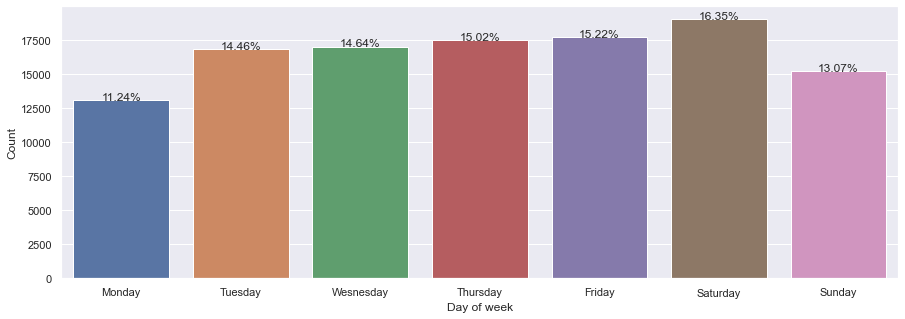

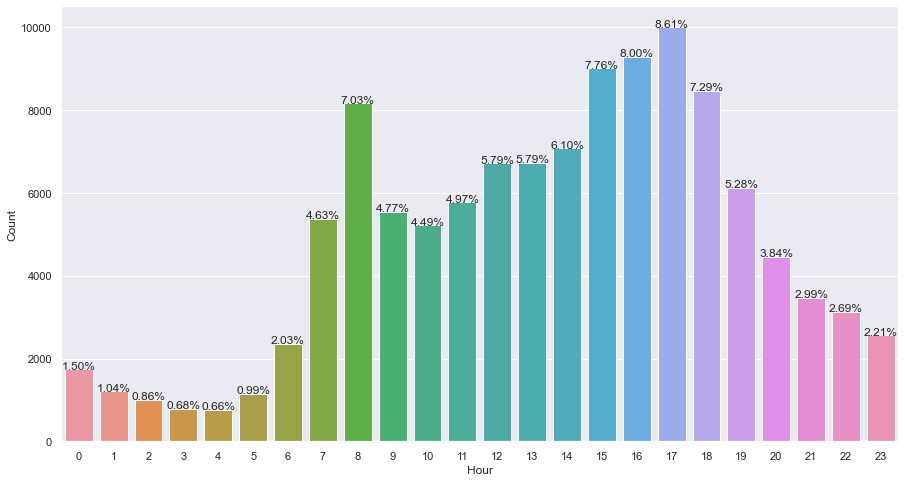

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
weekplot = sns.countplot(x='Day_of_Week',data=acc_time)
weekplot.set(xlabel='Day of week', ylabel='Count')
for p in weekplot.patches: 
    height = p.get_height() 
    weekplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
weekplot.set(xticklabels=['Monday','Tuesday','Wesnesday','Thursday','Friday','Saturday','Sunday'])
plt.show()
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
Hourplot = sns.countplot(x='Hour',data=acc_time)
Hourplot.set(xlabel='Hour', ylabel='Count')
for p in Hourplot.patches: 
    height = p.get_height() 
    Hourplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.show()

####  By observing graphs above we can say that on saturday there is more chance of getting injury or accident than other days 


#### we can also say that it is high risk to travel in morning at 8.pm and at the evening


# c.2 Machine Learning approach

In [33]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.38657143, 0.37628571, 0.377     , 0.379     , 0.38378571,
       0.37985714, 0.40071429, 0.4005    , 0.398     ])

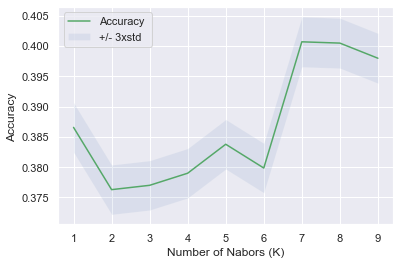

In [34]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
#plt.tight_layout()
plt.show()

In [64]:
k=7
neigh1=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh1
yhat1=neigh1.predict(X_test)


# SupportVectorMachines(SVM)

In [36]:

accidentsvm=svm.SVC(kernel="rbf")
accidentsvm.fit(X_train,y_train)

SVC()

In [37]:
yhat2 = accidentsvm.predict(X_test)


# DecisionTreeClassifier

In [38]:

SeverityTree=DecisionTreeClassifier( criterion="entropy",max_depth=6)
SeverityTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [39]:
yhat3 = SeverityTree.predict(X_test)


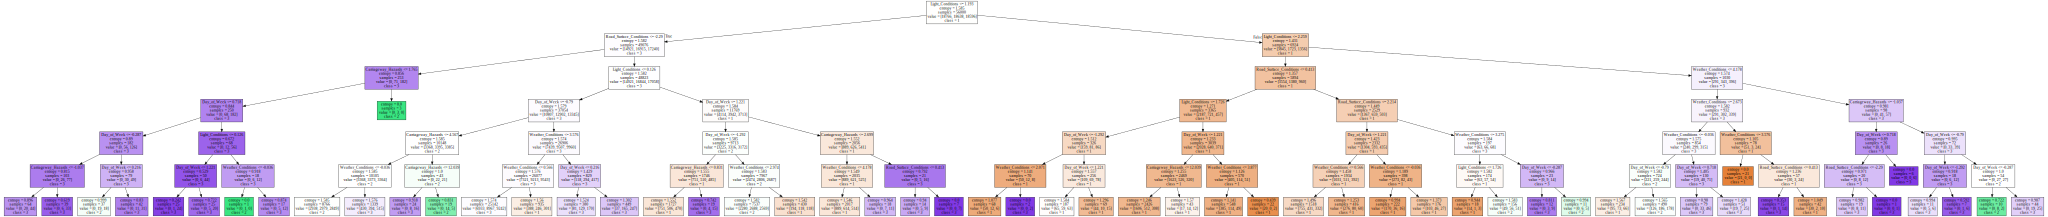

In [40]:
import graphviz
from sklearn import tree
Features_names=X_ros.columns[0:5]


dot_data = tree.export_graphviz(SeverityTree, out_file=None, 
                                feature_names=Features_names,  
                                class_names=["1","2","3"],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph



In [41]:
graph.render("decision_tree_graphivz")
'decision_tree_graphivz.png'

'decision_tree_graphivz.png'

# Logistic Regression

In [42]:

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [43]:
yhat4=LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.41543712, 0.30522063, 0.27934225],
       [0.28977563, 0.35053406, 0.35969031],
       [0.28977563, 0.35053406, 0.35969031],
       ...,
       [0.29305932, 0.34901926, 0.35792142],
       [0.28325286, 0.35354078, 0.36320636],
       [0.42220086, 0.32232919, 0.25546995]])

 #  Model Evaluation

In [65]:
jc1=jaccard_score(y_test, yhat1,average='weighted')
fs1=f1_score(y_test, yhat1, average='weighted')
jc2=jaccard_score(y_test, yhat2,average='weighted')
fs2=f1_score(y_test, yhat2, average='weighted')
jc3=jaccard_score(y_test, yhat3,average='weighted')
fs3=f1_score(y_test, yhat3, average='weighted')
jc4=jaccard_score(y_test, yhat4,average='weighted')
fs4=f1_score(y_test, yhat4, average='weighted')
ll4=log_loss(y_test, yhat_prob)

list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]


In [66]:
print("Report")
import pandas as pd
df = pd.DataFrame(list_jc, index=['KNN','SVM','DecisionTree','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Report


Algorithm,Jaccard,F1-score,LogLoss
KNN,0.251751,0.402115,NA
SVM,0.250214,0.399372,NA
DecisionTree,0.244702,0.391529,NA
Logistic Regression,0.210959,0.333193,1.08484


# 4.Results 

# 4.2 Machine Learning modeling  results

we used classificationalgorithm to model our data we can notice that our model performance is quite poor predicting accidentseverity.By observing our data which is imbalanced  inorder to balance our dataset we do require some knowledge in deeplearnings And from a conceptual standpoint, 
it appears normal that one cannot predict with a lot of precision the outcome of an accident with the
classifiers at hand. One would therefore recommend discarding this ML analysis and focusing on the
traditional results presented above

# 5. Discussion of the Results
At the end of this analysis, it appears clearly that not much can be done with simple Machine Learning
techniques with the dataset as provided by the UK govt. Indeed, the categorical classifiers
complexify the analysis a lot and one would need more advanced techniques (not taught in this course) to
be able to complete a more meaningful analysis. Conversely, one can also notice that quite a few insights
are already obtained from the traditional data analysis methods, and that there is limited interest in
exploring a dataset of that type with an ML approach.

# 6. Conclusion
In conclusion, the reader will have taken note that key factors. of accidents in uk over the year
2018 have been as follows :
...The summer is a critical period.

...Accidents seem to overly take place in the morning at 8 and evenings, possibly when people come
back from work.

...Accidents seem to be more fatal when  there high winds and raining

...Accidents seem to be more fatal when surface is wet or any animal on road

...Accidents seem to be more fatal when lightconditions are Daylight